# Model Validation and Hyperparameters
**Adapted from Python Data Science Handbook by Jake VanderPlas**

https://jakevdp.github.io/PythonDataScienceHandbook/ 

In [42]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

**The Iris Data Set**

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems*. 

The data set consists of 50 samples from each of three species of Iris (*Iris setosa, Iris virginica* and *Iris versicolor*). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a model to distinguish the species from each other.

*Iris setosa* <sub>https://commons.wikimedia.org/w/index.php?curid=170298</sub>

<img src="Iris/Iris_setosa.png" align=left width=100 height=100/>

*Iris versicolor* <sub>https://commons.wikimedia.org/w/index.php?curid=248095</sub>

<img src="Iris/Iris_versicolor.png" align=left width=100 height=100/>

*Iris virginica* <sub>https://commons.wikimedia.org/w/index.php?curid=9805580</sub>

<img src="Iris/Iris_virginica.png" align=left width=100 height=100/>

## Model Validation

### Holdout Sets
 
Hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance.

**k-neighbors classifier**: with n_neighbors=1; the label of an unknown point is the same as the label of its closest training point.

In [43]:
from sklearn.datasets import load_iris

iris = load_iris()

In [44]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [45]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [46]:
# print the first five rows
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [47]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [48]:
X = iris.data
y = iris.target

In [49]:
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=0,
                                                    train_size=0.5)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# fit the model
knn_clf = KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
from sklearn.metrics import accuracy_score

# evaluate the model on the test set
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9066666666666666

### Cross-Validation

A sequence of fits where each subset of the data is used both as a training set and as a validation set

In [52]:
# 2 validation trials
model_1 = knn_clf.fit(X_train, y_train).predict(X_test)
model_2 = knn_clf.fit(X_test, y_test).predict(X_train)
accuracy_score(y_train, model_2), accuracy_score(y_test, model_1)

(0.96, 0.9066666666666666)

In [53]:
# train the model on 4/5 of the data and 
# evaluate the model on the remaining 1/5
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### Leave-One-Out Cross Validation

The number of folds is equal to the number of data points: we train on all points but one in each trial. 

In [54]:
# 150 samples, the leave one out cross-validation yields scores for 150 trials
# the score indicates either successful (1.0) or unsuccessful (0.0) prediction
from sklearn.model_selection import LeaveOneOut

cv = LeaveOneOut()

scores = cross_val_score(knn_clf, X, y, cv=cv)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [55]:
scores.mean()

0.96

## Selecting the Best Model
If our estimator is underperforming:
* use a more complicated/more flexible model
* use a less complicated/less flexible model
* gather more training samples
* gather more data to add features to each sample

### The Bias-Variance Trade-Off
- **model underfits the data**: it does not have enough flexibility to suitably account for all the features in the data; the model has high **bias**
- **model overfits the data**: it has so much flexibility that ends up accounting for random errors as well as the underlying data distribution; the model has high **variance**

- **high-bias models**: the performance of the model on the validation set is similar to the performance on the training set
- **high-variance models**: the performance of the model on the validation set is far worse than the performance on the training set

### Validation Curves in Scikit-Learn

**validation_curve**: given a model, data, parameter name, and a range to explore, it will automatically compute both the training score and validation score across the range.


In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

Create some data:

In [57]:
def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

Visualize the data and the polinomial fits:

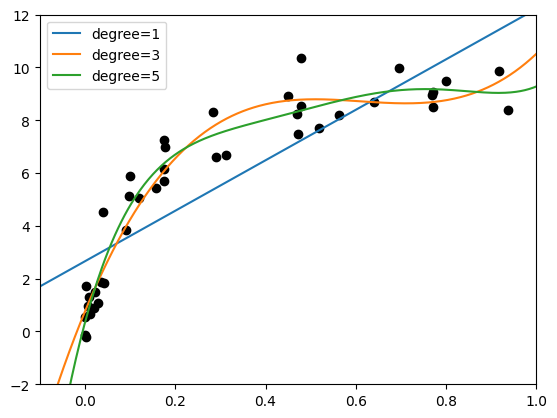

In [58]:
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1)
plt.ylim(-2, 12)
plt.legend(loc='best');

The plot illustrates different degrees of polynomial to provide a suitable trade-off between bias (under-fitting) and variance (over-fitting).

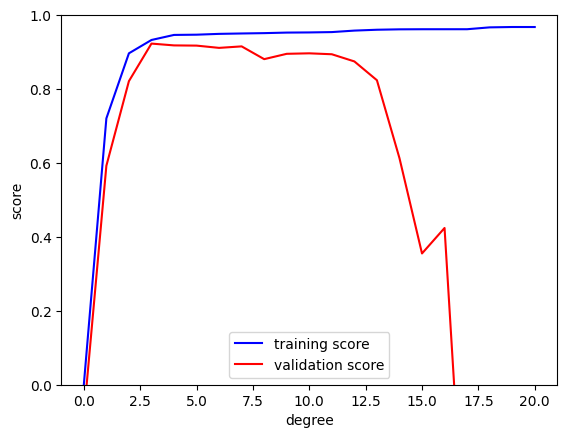

In [59]:
# validation_curve --> cv: determines the cross-validation splitting strategy
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), 
                                          X, 
                                          y, 
                                          param_name='polynomialfeatures__degree', 
                                          param_range=degree, 
                                          cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', 
         label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', 
         label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

The training score is everywhere higher than the validation score and is monotonically improving with increased model complexity.

The validation score reaches a maximum before dropping off as the model becomes over-fit.

Here the optimal trade-off between bias and variance is found for a third-order polynomial illustrated as follows:

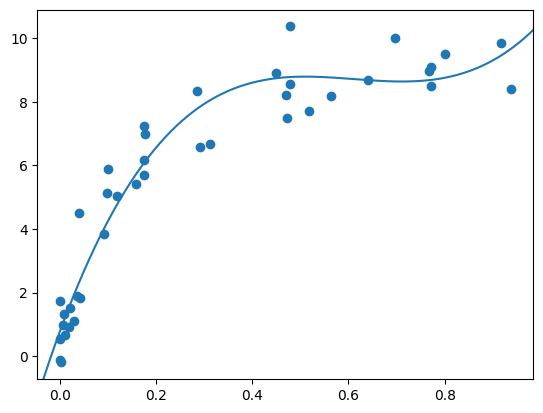

In [60]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

## Learning Curves

Generate a new dataset:

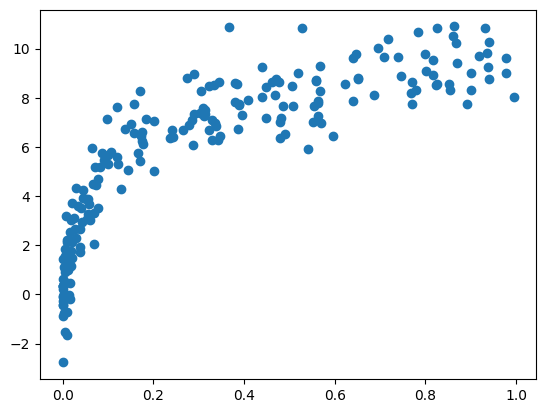

In [61]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

We will duplicate the preceding code to plot the validation curve for this larger dataset​:

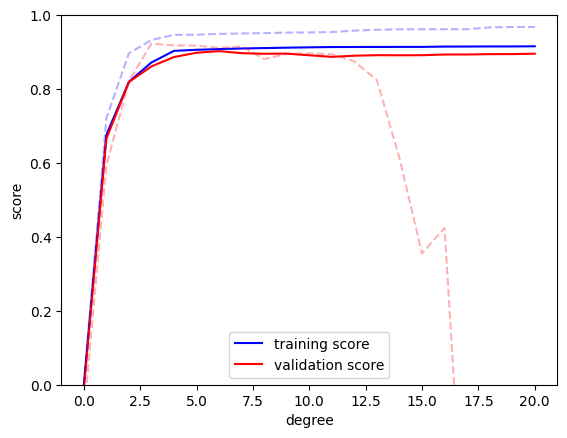

In [62]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), 
                                            X2, y2,
                                            param_name='polynomialfeatures__degree', 
                                            param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', 
         label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', 
         label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, 
         linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, 
         linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

The solid lines show the new results, while the fainter dashed lines show the results of the previous smaller dataset. 

The validation curve shoes that the larger dataset supports a much more complicated model: the peak is around a degree of 6, but even a degree-20 model is not seriously over-fitting the data—the validation and training scores remain very close.

**The general behavior we would expect from a learning curve ;**

- A model of a given complexity will overfit a small dataset: training score will be relatively high, while the validation score will be relatively low.
- A model of a given complexity will underfit a large dataset: the training score will decrease, but the validation score will increase.
- A model will never, except by chance, give a better score to the validation set than the training set: the curves should keep getting closer together but never cross.

### Learning Curves in Scikit-Learn

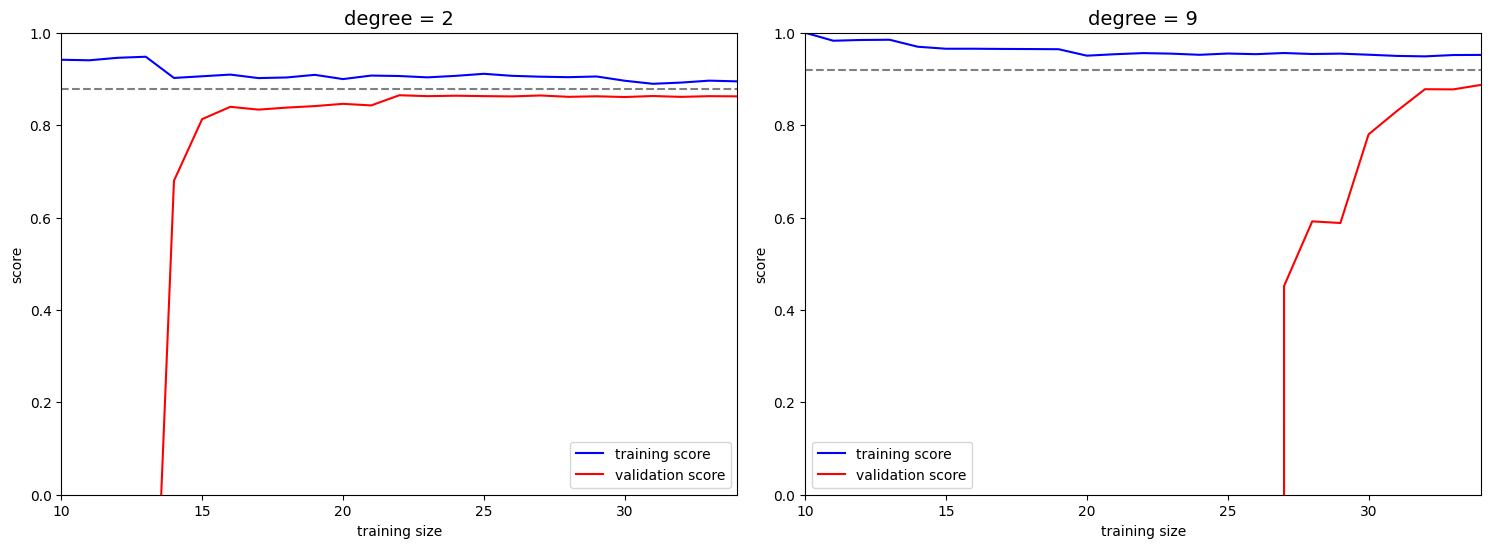

In [63]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', 
               label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', 
               label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

When the learning curve has already converged (i.e., when the training and validation curves are already close to each other) adding more training data will not significantly improve the fit as seen in the left panel, with the learning curve for the degree-2 model.

## Validation in Practice: Grid Search
- exhaustive search over specified parameter values for an estimator
- implements a “fit” method and a “predict” method like any classifier except that the parameters of the classifier used to predict is optimized by cross-validation

In [64]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': [1, 3, 5, 7]}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7]})

In [65]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [66]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9733333333333334

**Conclusion:**

The use of a validation set or cross-validation approach is vital when tuning parameters in order to avoid over-fitting for more complex/flexible models.

### Exercise:

- Try different values for `n_neighbors` and check the best score.
- Try different cv values in GridSearch.